In [1]:
# Import libraries
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Read News and DJIA Data
df_news = pd.read_csv(os.path.join('..', 'data', 'RedditNews.csv'))
df_stock = pd.read_csv(os.path.join('..', 'data', 'upload_DJIA_table.csv'))

In [3]:
df_stock.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312


In [4]:
# check data
display(df_news.info())
display(df_stock.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73608 entries, 0 to 73607
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    73608 non-null  object
 1   News    73608 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


None

In [5]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
import re

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the stop words
stop_words = set(stopwords.words('english'))

# Define a function to preprocess the headlines
def preprocess_text(text):
    # Convert the text to lower case
    text = text.lower()
    
    text = re.sub(r"b'",'', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize the text
    text = text.split()
    
    # Remove stop words and lemmatize the words
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
    
    # Join the words back into a single string
    text = ' '.join(text)
    
    return text

# Apply the function to the headlines
df_news['News_Preprocessed'] = df_news['News'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\duzzi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\duzzi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\duzzi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [6]:
df_stock.sort_values(by='Date',inplace=True)

In [7]:
# Convert prices to returns
df_stock.sort_values(by='Date',inplace=True)
df_stock['returns'] = df_stock['Adj Close'].pct_change()

# Drop the first row, which will have a missing return
df_stock = df_stock.dropna()

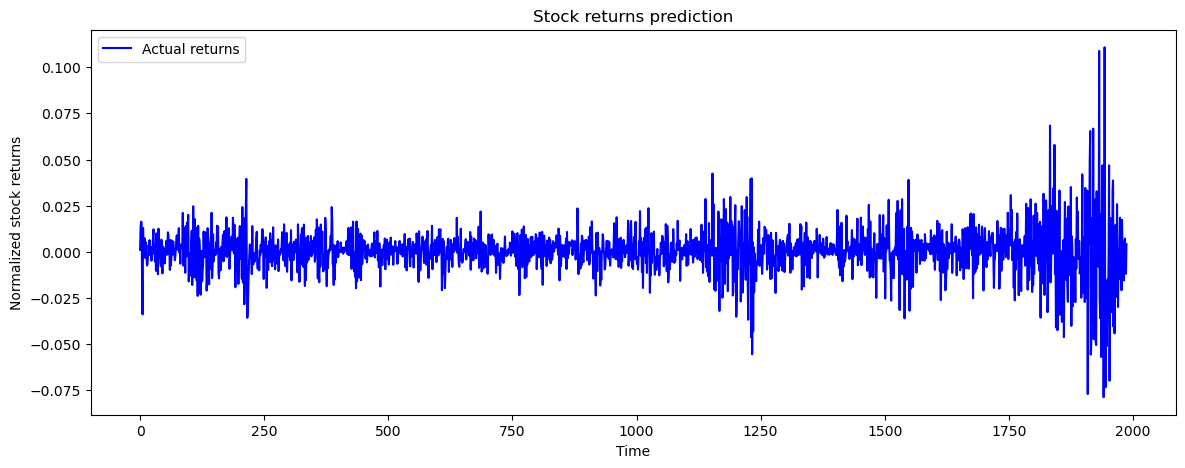

In [8]:
import matplotlib.pyplot as plt

# Plot the actual and predicted returns
plt.figure(figsize=(14, 5))
plt.plot(df_stock['returns'], color='blue', label='Actual returns')
plt.title('Stock returns prediction')
plt.xlabel('Time')
plt.ylabel('Normalized stock returns')
plt.legend()
plt.show()


## Sentiment Analysis

### Vader Score

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\duzzi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [12]:
# Define a function to calculate sentiment scores
def get_sentiment(text):
    # Calculate the sentiment scores
    sentiment = analyzer.polarity_scores(text)
    
    # Return the compound score
    return sentiment['compound']

# Apply the function to the headlines
df_news['sentiment_vader'] = df_news['News_Preprocessed'].apply(get_sentiment)

In [13]:
from textblob import TextBlob

def get_sentiment_Blob(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    
    # Get the sentiment
    sentiment = blob.sentiment
    
    # Return the compound score
    return sentiment[0]

# Apply the function to the headlines
df_news['sentiment_blob'] = df_news['News_Preprocessed'].apply(get_sentiment_Blob)

In [14]:
pip install flair

                                              0.0/373.1 kB ? eta -:--:--
     ---                                   30.7/373.1 kB 660.6 kB/s eta 0:00:01
     -------                               71.7/373.1 kB 787.7 kB/s eta 0:00:01
     -----------                          122.9/373.1 kB 804.6 kB/s eta 0:00:01
     --------------                       153.6/373.1 kB 766.6 kB/s eta 0:00:01
     -------------------                  204.8/373.1 kB 778.2 kB/s eta 0:00:01
     ----------------------               235.5/373.1 kB 761.1 kB/s eta 0:00:01
     ---------------------------          286.7/373.1 kB 806.1 kB/s eta 0:00:01
     ------------------------------       317.4/373.1 kB 787.7 kB/s eta 0:00:01
     -----------------------------------  368.6/373.1 kB 820.1 kB/s eta 0:00:01
     ------------------------------------ 373.1/373.1 kB 801.0 kB/s eta 0:00:00
                                              0.0/172.4 MB ? eta -:--:--
                                              0.0/172.

In [19]:
from flair.models import TextClassifier
from flair.data import Sentence

# Load the sentiment classifier
classifier = TextClassifier.load('en-sentiment')

# Create a sentence
sentence = Sentence('Flair sentiment analysis is ok!')

# Predict the sentiment
classifier.predict(sentence)

print(sentence.labels)
sentence.score


['Sentence[6]: "Flair sentiment analysis is ok!"'/'POSITIVE' (0.6555)]


0.6555489897727966

In [20]:
sentence.score

0.6555489897727966

### FinBert

In [32]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch.nn import Softmax

# Check if a GPU is available and if not, use a CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained model and tokenizer (FinBERT from ProsusAI)
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

# Move the model to the GPU if one is available
model = model.to(device)

# Put model in evaluation mode
model.eval()

# Convert inputs to PyTorch tensors
text = "Apple is ok."

def get_sentiment_FinBert(text):
    inputs = tokenizer(text, return_tensors="pt")
    
    # Move the inputs to the GPU if one is available
    inputs = inputs.to(device)

    # Predict the sentiment
    with torch.no_grad():
        outputs = model(**inputs)

    # Apply softmax to the output to get probabilities
    probs = Softmax(dim=1)(outputs.logits)
    
    # Move probs to cpu
    probs = probs.cpu()
    
    # Convert tensor to list and return separate values
    probs = probs[0].tolist()
    return probs[0], probs[1], probs[2]

# Apply the function to the headlines
df_news['sentiment_FinBert_positiv'],df_news['sentiment_FinBert_negative'],df_news['sentiment_FinBert_neutral'] = df_news['News'].apply(get_sentiment_FinBert)
# get_sentiment_FinBert(text)

KeyboardInterrupt: 

In [22]:
# Calculate the mean sentiment score for each stock for each day
df = df_news.groupby('Date') \
       .agg({'sentiment':'mean',
            'sentiment_blob':'mean',
            'sentiment_FinBert_positiv':'mean',
            'sentiment_FinBert_negative':'mean',
            'sentiment_FinBert_neutral':'mean'}) \
       .rename(columns={'sentiment_vader':'sentiment_vader', 
                        'sentiment_blob':'sentiment_blob',
                        'sentiment_FinBert_positiv':'sentiment_FinBert_positiv',
                        'sentiment_FinBert_negative':'sentiment_FinBert_negative',
                        'sentiment_FinBert_neutral':'sentiment_FinBert_neutral'}) \
       .reset_index()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2943 non-null   object 
 1   mean_sentiment       2943 non-null   float64
 2   mean_sentiment_blob  2943 non-null   float64
dtypes: float64(2), object(1)
memory usage: 69.1+ KB


In [24]:
df = df.merge(df_stock[['Date', 'returns']], on='Date')

In [25]:
df['Date'] = pd.to_datetime(df['Date'])

In [26]:
# set the index
df.set_index('Date', inplace=True)

In [27]:
# Calculate the index to split the data
split_idx = int(len(df) * 0.8)

# Split the data into training and testing sets
train = df.iloc[:split_idx]
test = df.iloc[split_idx:]

In [28]:
test

,mean_sentiment,mean_sentiment_blob,return
Date,,,
2014-12-03,-0.283136,0.031537,0.001850
2014-12-04,-0.366076,-0.097358,-0.000699
2014-12-05,-0.207776,0.021823,0.003279
2014-12-08,-0.254348,-0.022987,-0.005920
2014-12-09,-0.210332,-0.018333,-0.002872
...,...,...,...
2016-06-27,-0.131636,0.003040,-0.014971
2016-06-28,-0.036128,0.021832,0.015722
2016-06-29,-0.181044,0.041622,0.016368


In [29]:
import numpy as np

# Define the number of timesteps
timesteps = 60

# Define a function to prepare the data for the LSTM
def prepare_data(data, timesteps):
    X = []
    y = []
    
    for i in range(timesteps, len(data)):
        X.append(data[i-timesteps:i])
        y.append(data[i, -1])
    
    return np.array(X), np.array(y)

# Prepare the training and testing data
X_train, y_train = prepare_data(train[['mean_sentiment_blob', return]], timesteps)
X_test, y_test = prepare_data(test.values, timesteps)

# Reshape the data to the format required by the LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))


ValueError: cannot reshape array of size 275400 into shape (1530,60,2)

 ## LSTM model

In [33]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Initialize the model
model = Sequential()

# Add the LSTM layer
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 2)))

# Add the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [34]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
48/48 [==============================] - 3s 26ms/step - loss: 1.6854e-04
Epoch 2/100
48/48 [==============================] - 1s 26ms/step - loss: 1.4331e-04
Epoch 3/100
48/48 [==============================] - 1s 28ms/step - loss: 1.4319e-04
Epoch 4/100
48/48 [==============================] - 1s 25ms/step - loss: 1.3876e-04
Epoch 5/100
48/48 [==============================] - 1s 23ms/step - loss: 1.4487e-04
Epoch 6/100
48/48 [==============================] - 1s 25ms/step - loss: 1.3681e-04
Epoch 7/100
48/48 [==============================] - 1s 25ms/step - loss: 1.4464e-04
Epoch 8/100
48/48 [==============================] - 1s 25ms/step - loss: 1.4271e-04
Epoch 9/100
48/48 [==============================] - 1s 24ms/step - loss: 1.3808e-04
Epoch 10/100
48/48 [==============================] - 1s 25ms/step - loss: 1.4187e-04
Epoch 11/100
48/48 [==============================] - 1s 29ms/step - loss: 1.3702e-04
Epoch 12/100
48/48 [==============================] - 1s 28ms/s

48/48 [==============================] - 1s 23ms/step - loss: 1.3650e-04
Epoch 97/100
48/48 [==============================] - 1s 23ms/step - loss: 1.3451e-04
Epoch 98/100
48/48 [==============================] - 1s 24ms/step - loss: 1.3447e-04
Epoch 99/100
48/48 [==============================] - 1s 25ms/step - loss: 1.3442e-04
Epoch 100/100
48/48 [==============================] - 1s 24ms/step - loss: 1.3582e-04


In [35]:
# Make predictions
y_pred = model.predict(X_test)

11/11 [==============================] - 1s 13ms/step


In [36]:
y_pred

array([[-1.6814976e-03],
       [-7.3213305e-04],
       [ 6.9815898e-05],
       [-7.2403485e-04],
       [ 8.7904348e-04],
       [-1.3543351e-03],
       [ 2.1971413e-04],
       [-1.0581200e-03],
       [-2.6373444e-03],
       [-4.9013400e-04],
       [-1.6007088e-03],
       [-3.7977006e-05],
       [-8.5106306e-04],
       [ 1.0942057e-03],
       [ 3.1878322e-04],
       [ 4.1549199e-04],
       [ 7.1484526e-04],
       [ 1.7930346e-03],
       [ 4.0137838e-04],
       [-8.2724530e-04],
       [-2.6507557e-03],
       [-9.1585482e-04],
       [-1.4449554e-03],
       [-2.1817575e-03],
       [-2.9201817e-03],
       [-2.1764960e-03],
       [-2.0740114e-03],
       [-2.2286857e-03],
       [-2.2959115e-03],
       [-9.6033025e-04],
       [-1.2635642e-03],
       [-1.2923847e-03],
       [-8.3593116e-04],
       [ 1.2387423e-03],
       [-7.1647740e-04],
       [ 3.1234673e-04],
       [-5.0673750e-04],
       [-3.2776268e-04],
       [-3.3695181e-04],
       [-2.5935005e-06],


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Calculate the error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


MAE: 0.007444734122410704
MSE: 9.812161782313781e-05
RMSE: 0.009905635659721078


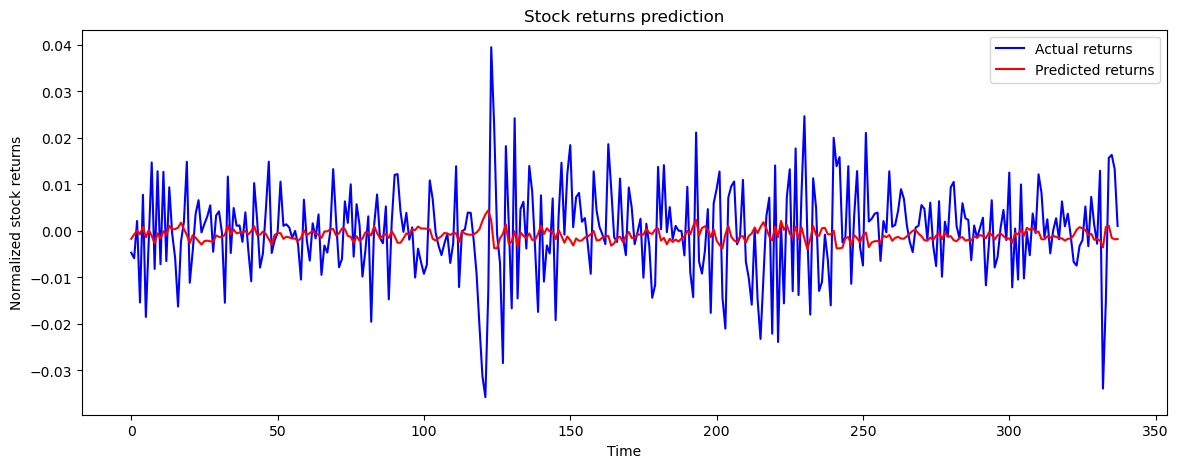

In [38]:
import matplotlib.pyplot as plt

# Plot the actual and predicted returns
plt.figure(figsize=(14, 5))
plt.plot(y_test, color='blue', label='Actual returns')
plt.plot(y_pred, color='red', label='Predicted returns')
plt.title('Stock returns prediction')
plt.xlabel('Time')
plt.ylabel('Normalized stock returns')
plt.legend()
plt.show()
